# Spatial Pattern Finding

## Global Morans'I

### 1.Entry Rate

Global Morans'I = 0.146

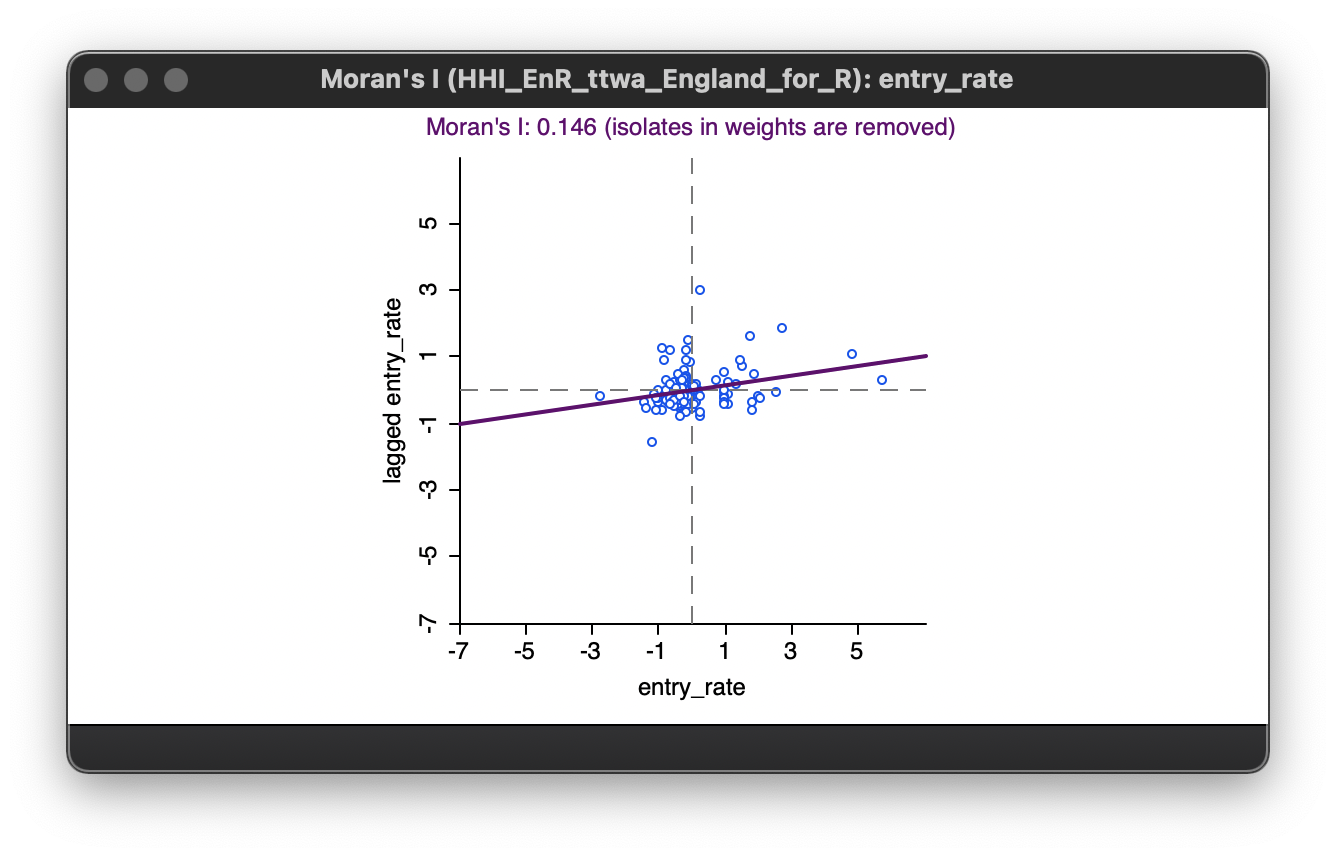

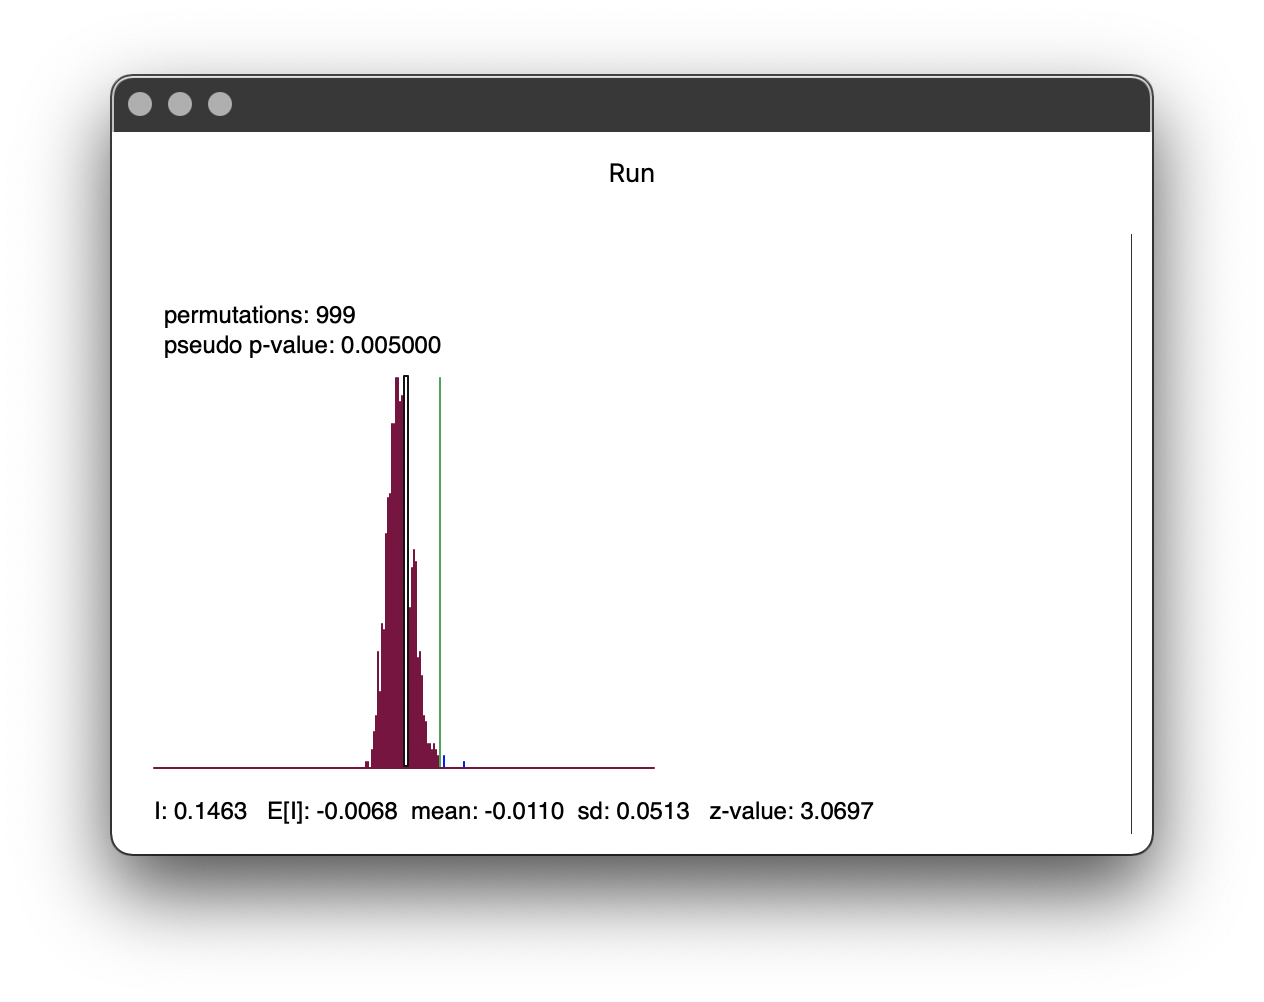

### 2.HHI

Global Morans'I = 0.296

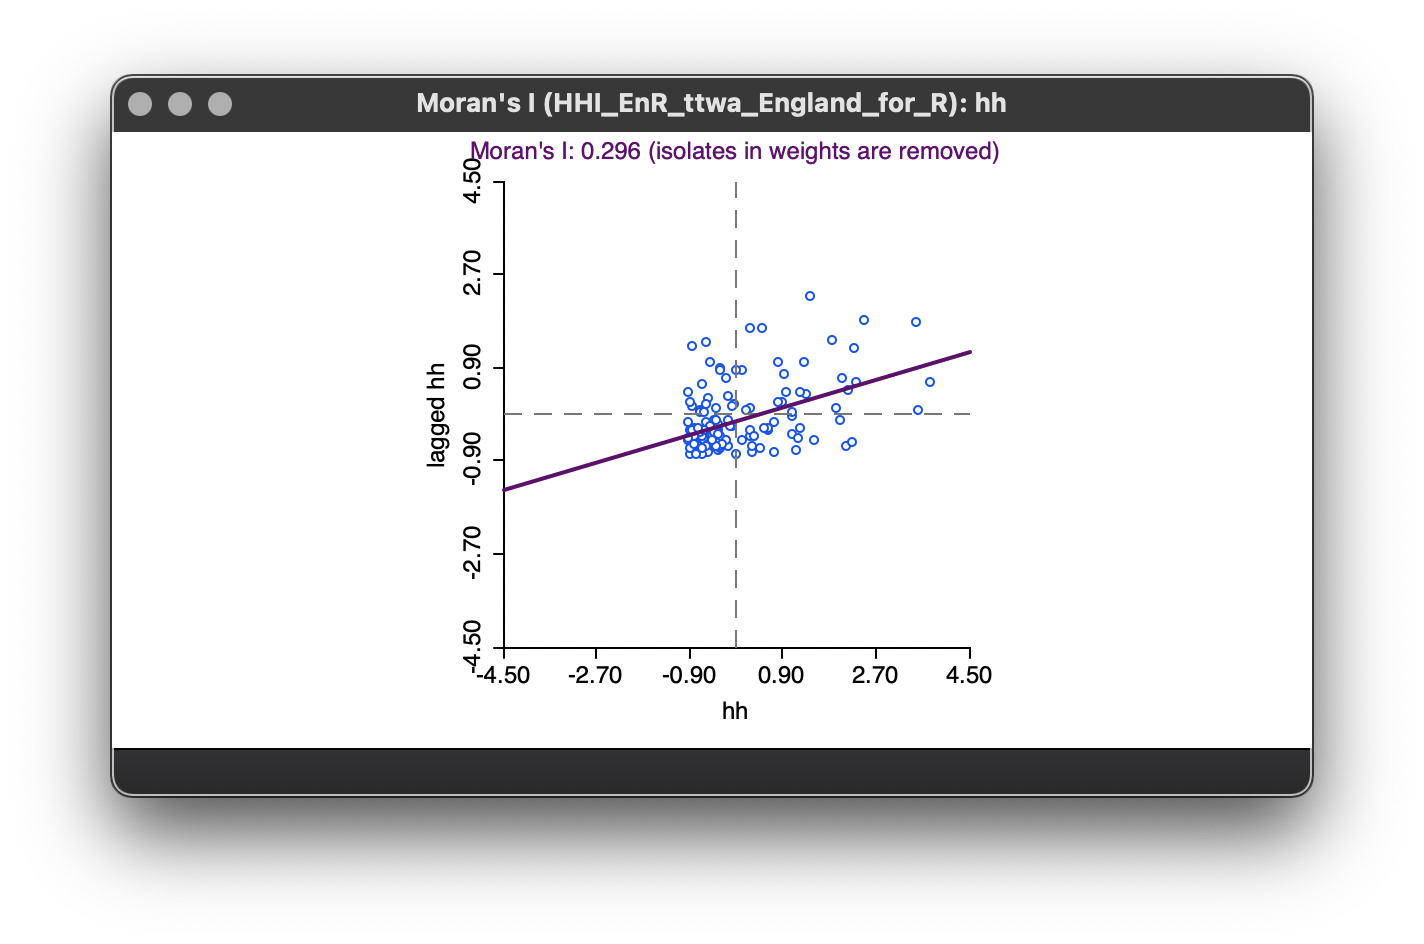

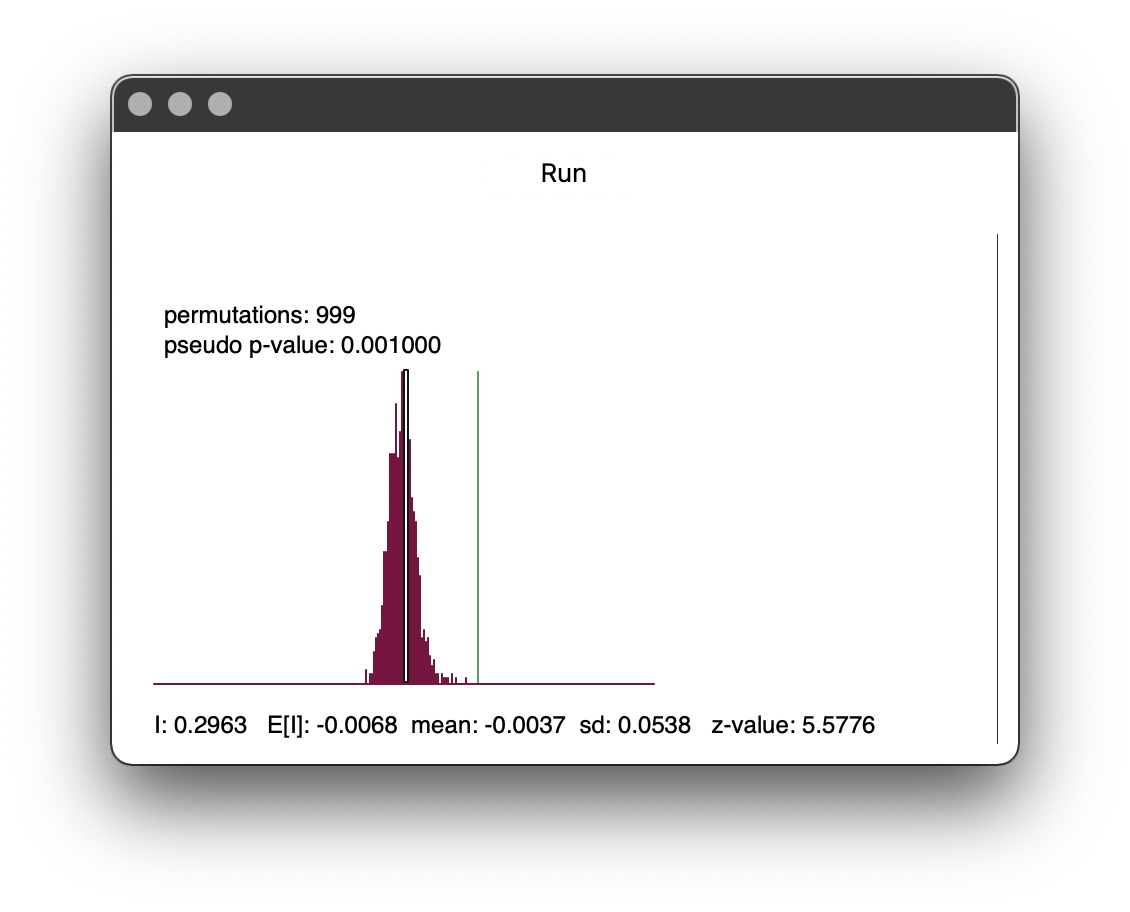

### 3.Asset

Global Morans'I = 0.025

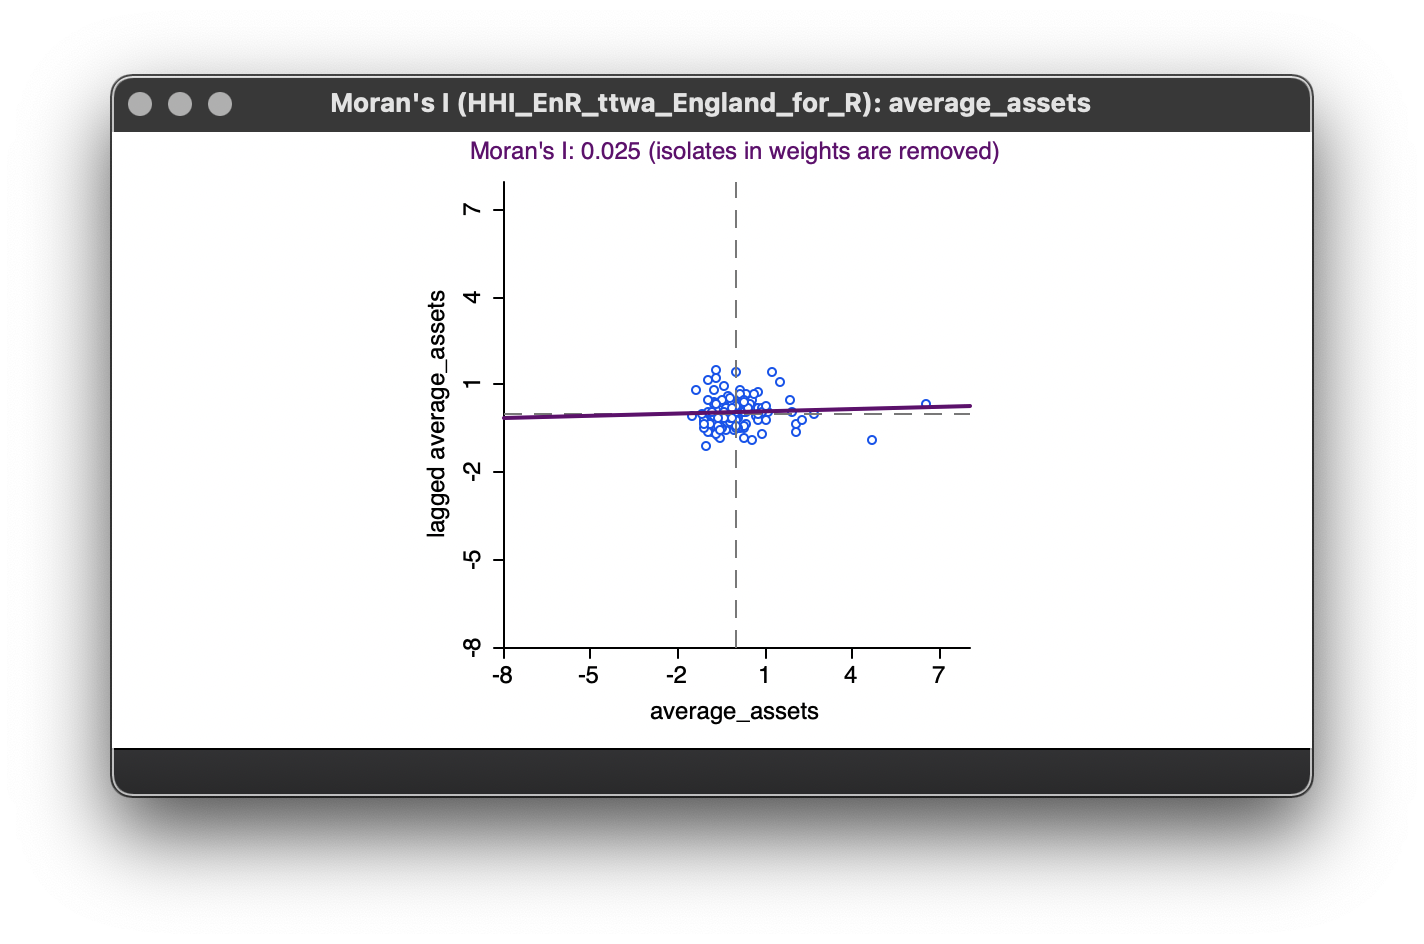

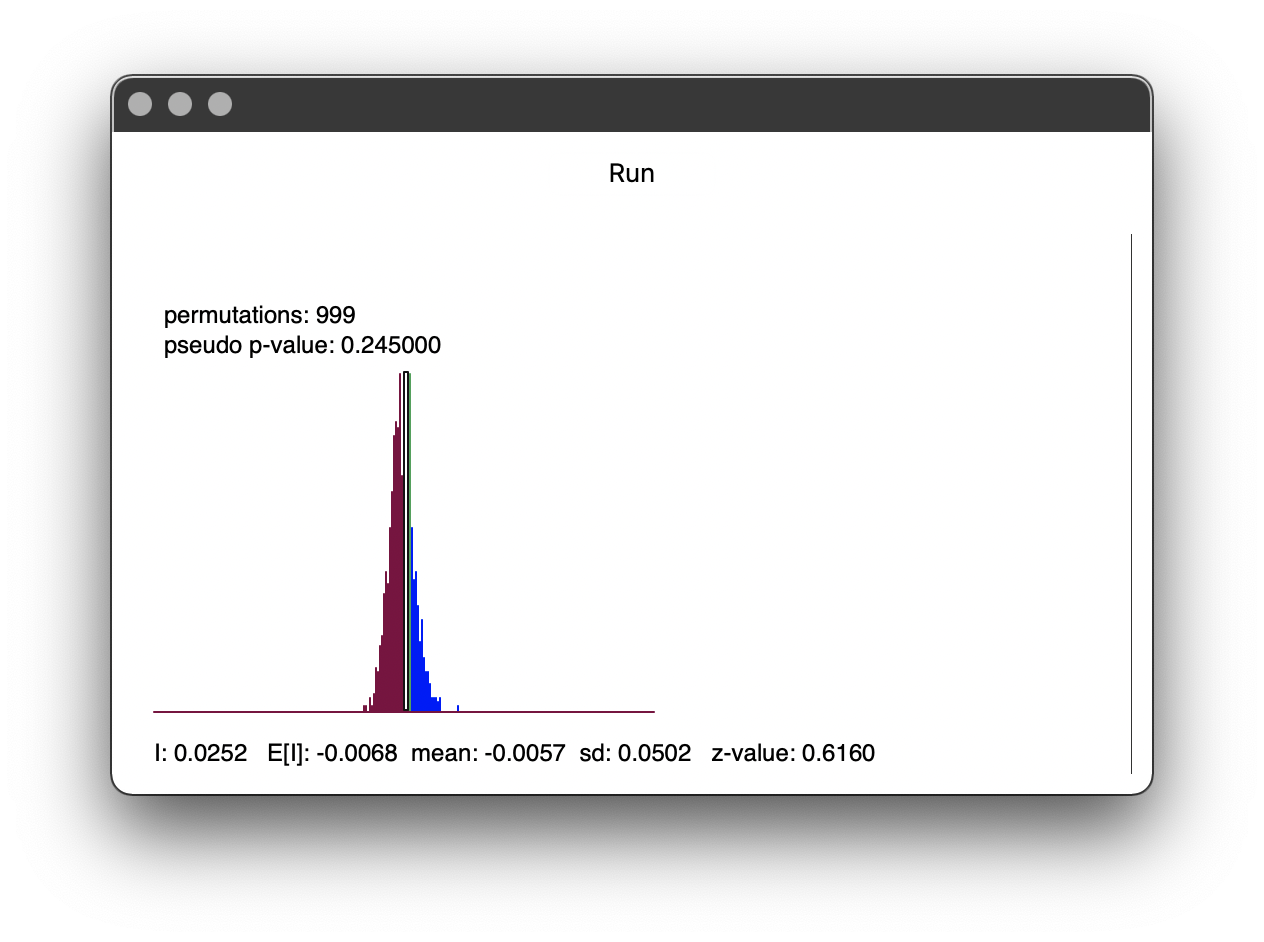

## LISA

### 1. Entry Rate

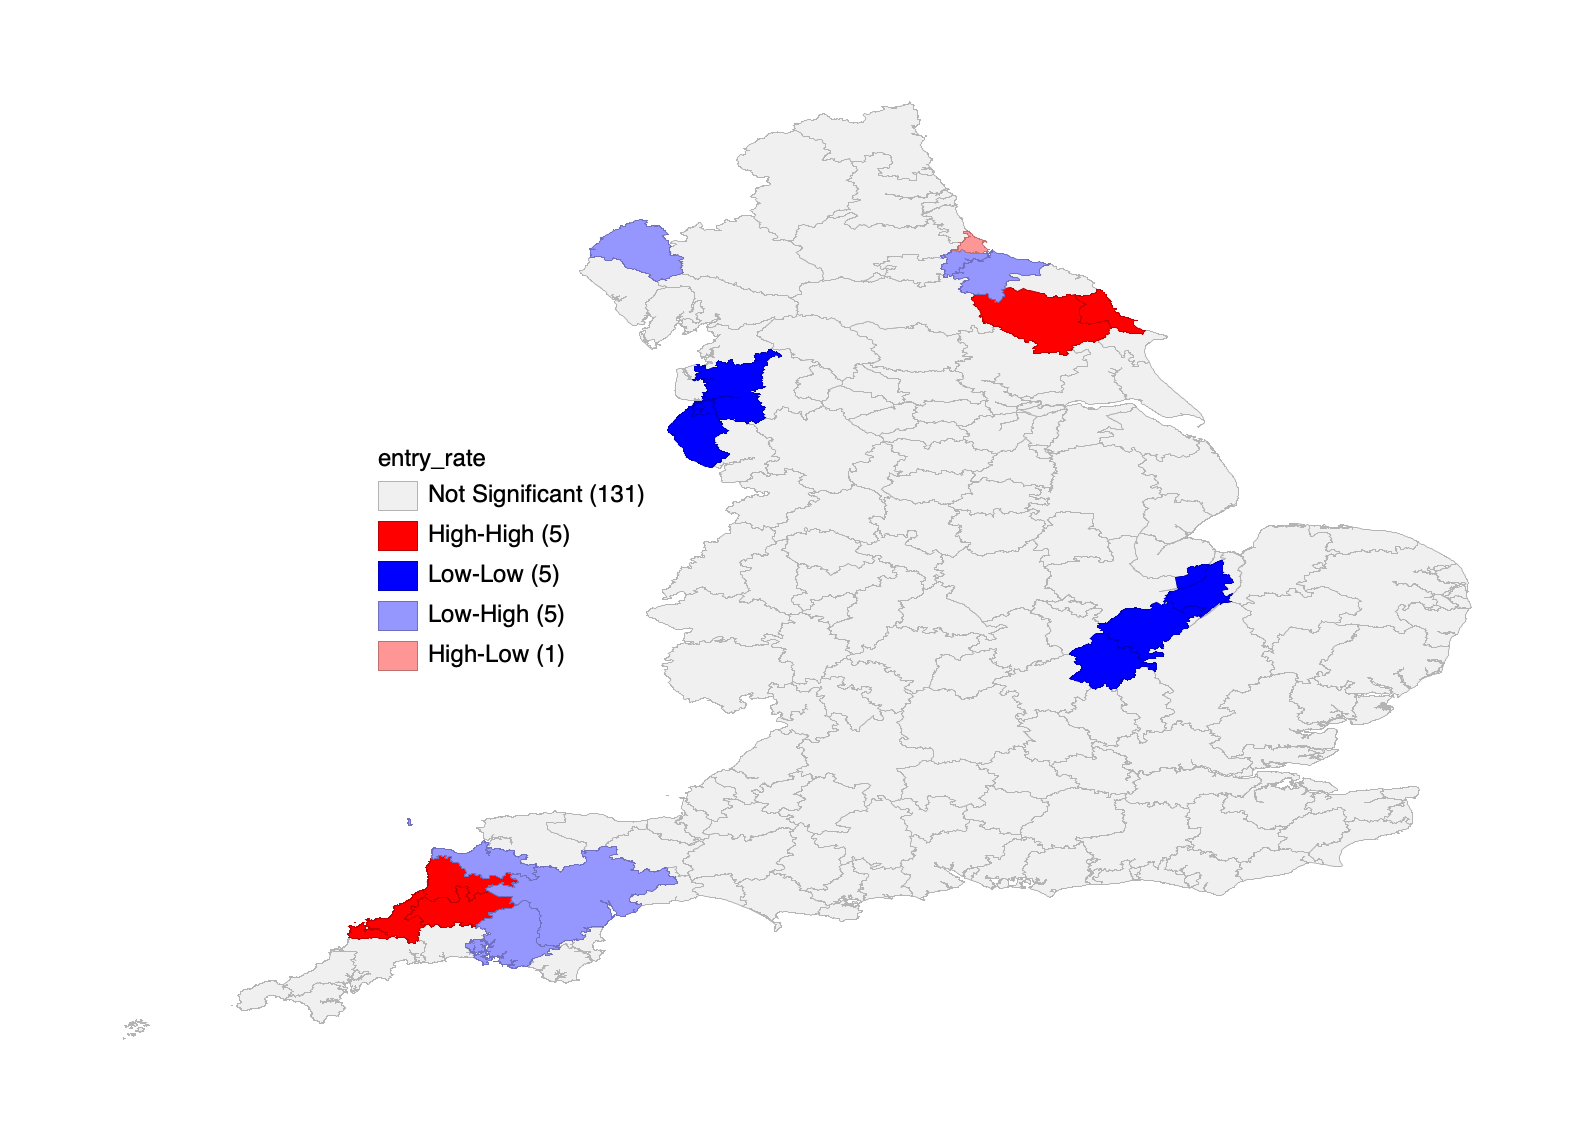

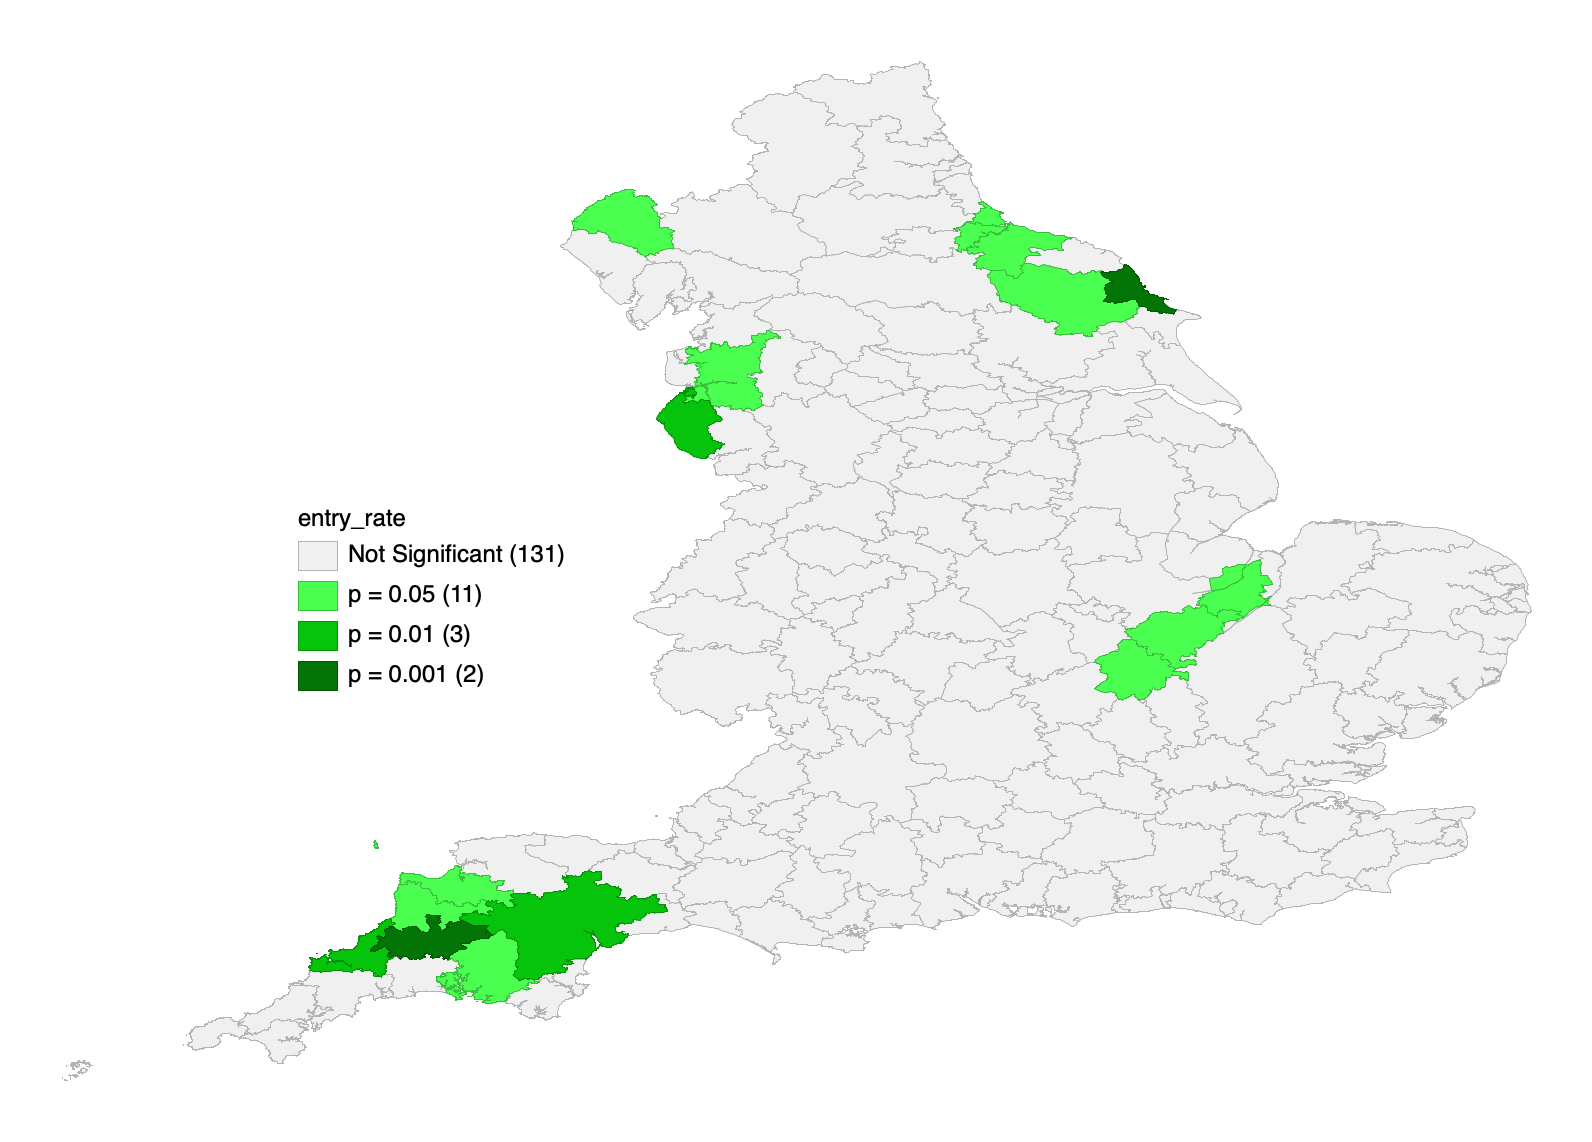

### 2. HHI

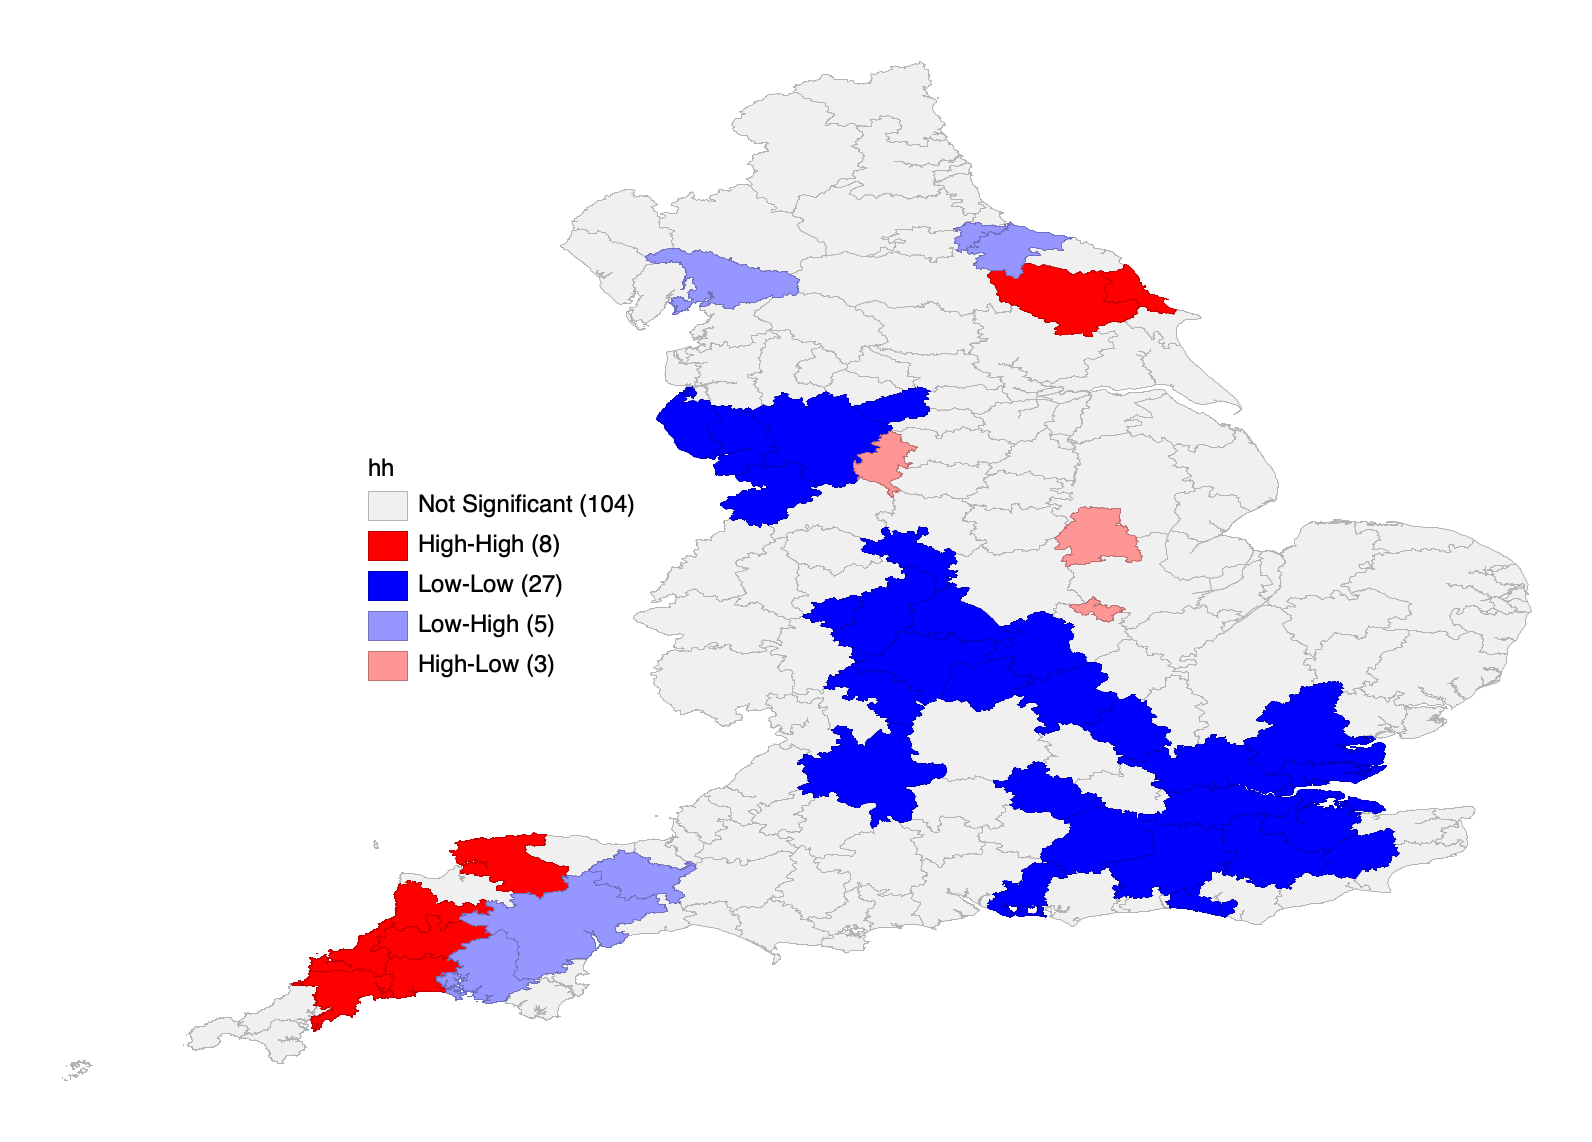

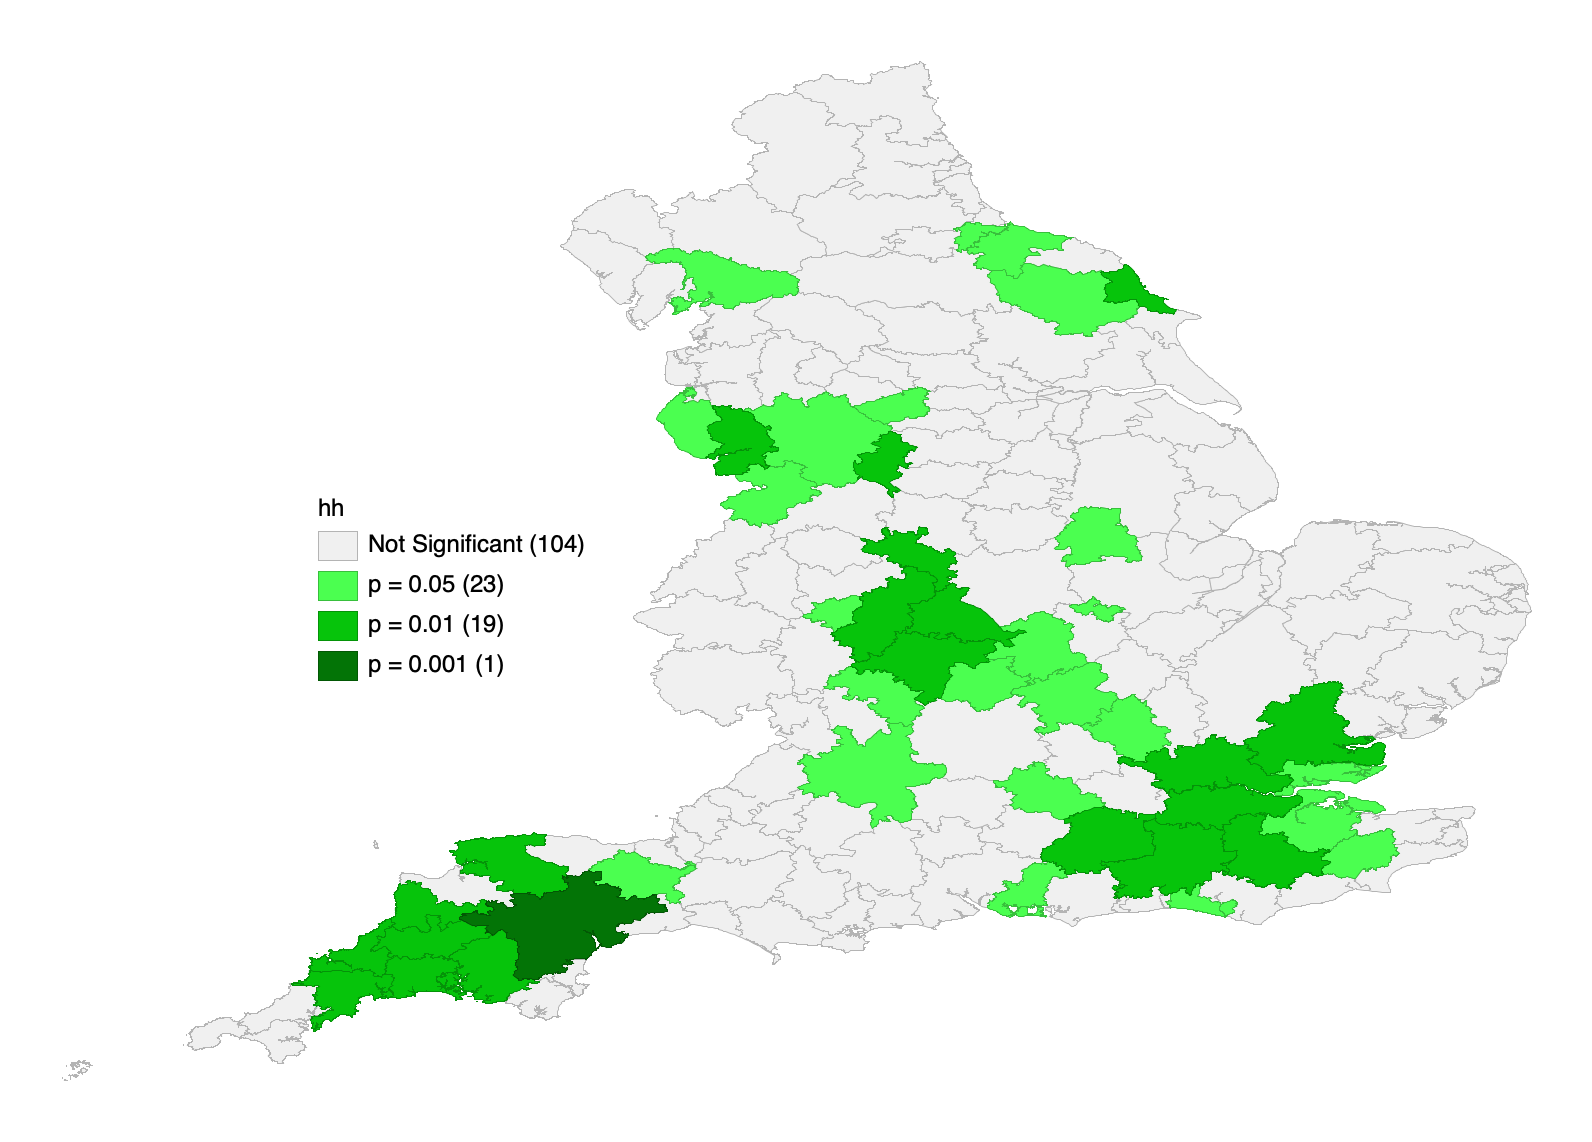

### 3. Asset

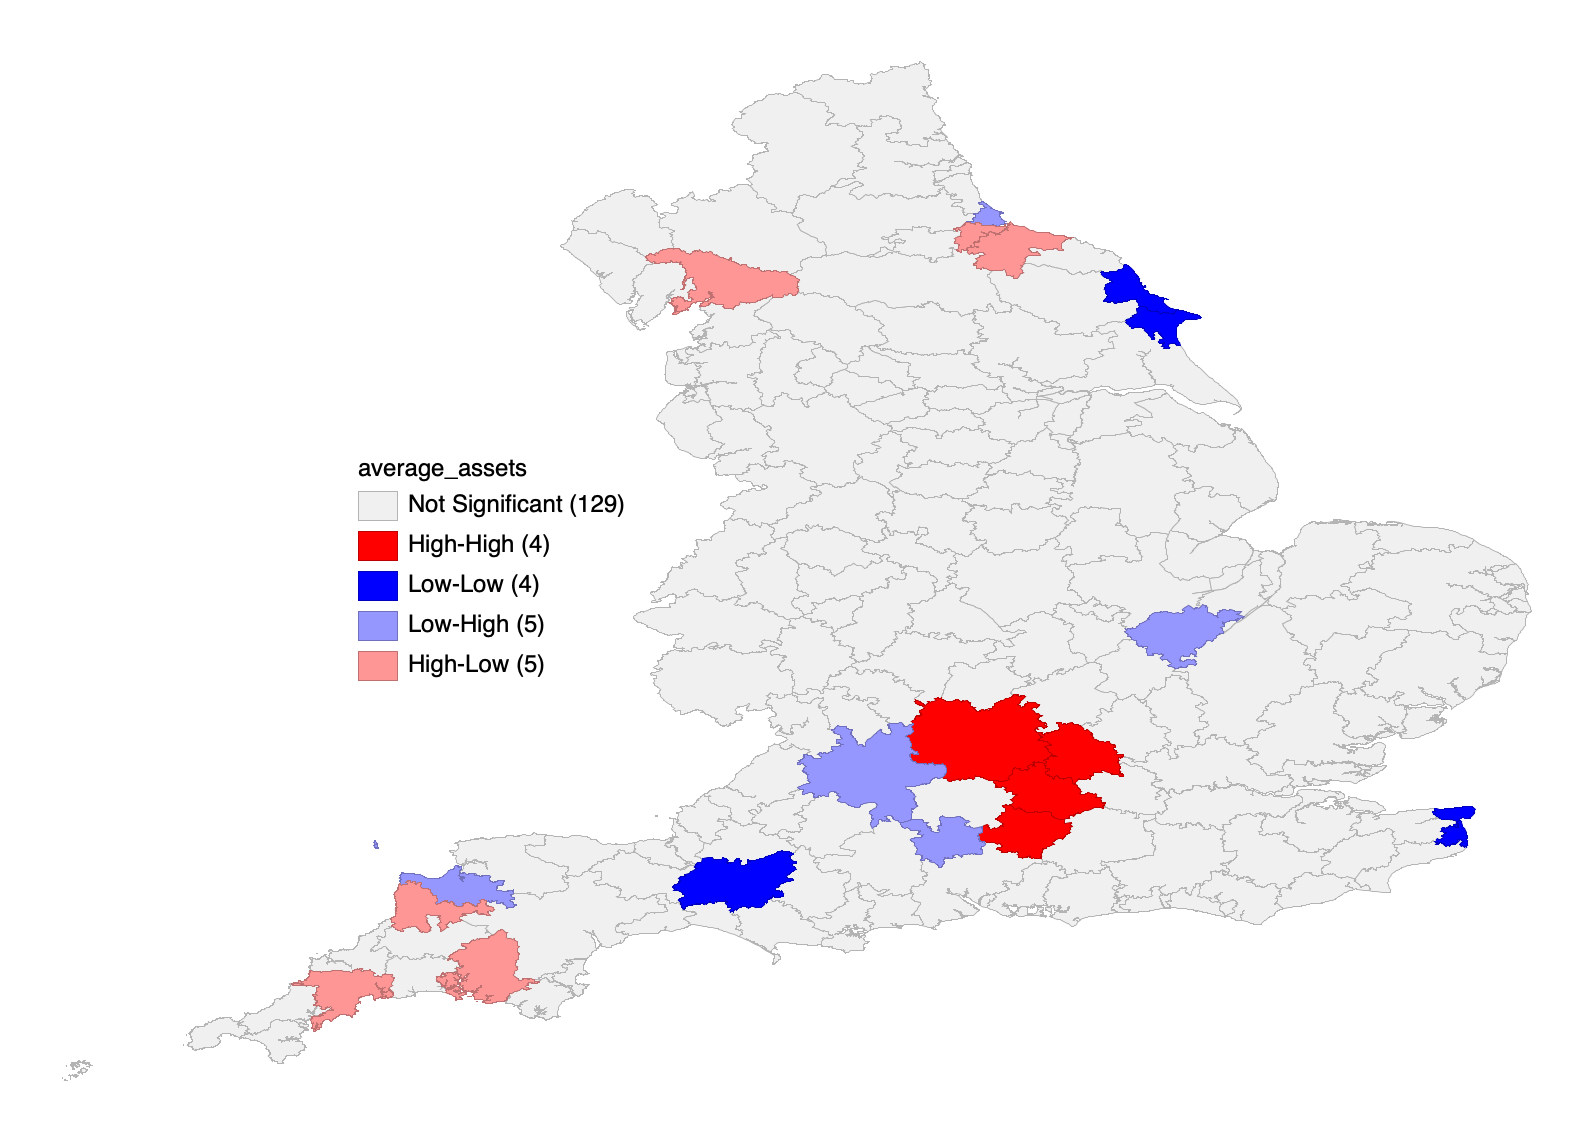

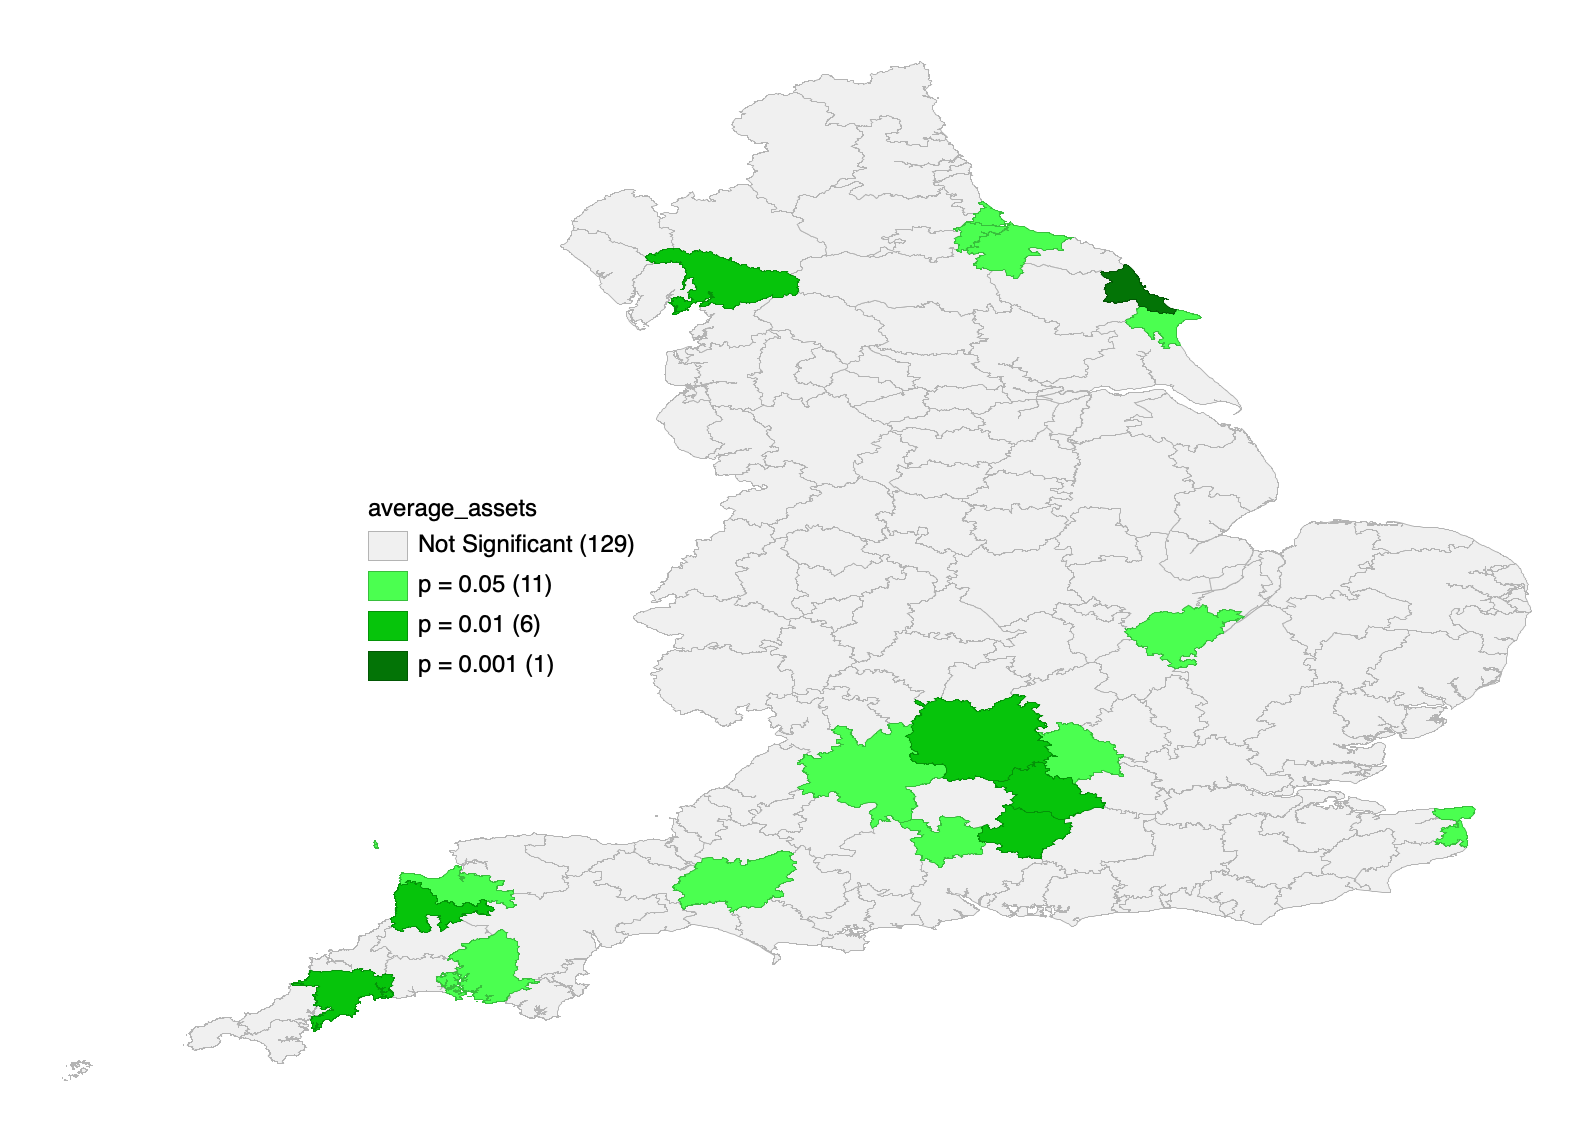

From the LISA, we can ascertain that there was statistically significant low clustering in England  

High entry rate seems to locate on the boundaries of England.

The LISA Cluser Map shows how the attribute entry rate clusters.  The red color shows tracts where high rate cluster with high rates, and blue shows where low rates cluster with low rates. There is even a mix of high-low, for example the pink color.  So, there is a cluster of high entry rate in the southwest commute area and clusters of lower ownership in the north.

## GWR

In (1)

1. classic

2. spatial lag

3. spatial error

In (2)

1. classic

2. spatial lag

3. spatial error

# Reproducible Analysis

```python
# read geojson data7

# df_mg.to_csv(PATH + "/HHI_EnR_ttwa_England_for_R.csv")

import geopandas as gpd
import fiona

import sys
PATH = sys.path[0]

# export the geojson
gdf = gpd.read_file(PATH + "/Dataset/Spatial/HHI_EnR_ttwa_England_for_R.geojson")
```

3 figures will be needed

|  | 1998         | 2008         |2018|
| --------------- |:------:| :---:|---:|
|Entry Rate       |   fig1_a   |  fig1_b  |  fig1_c  |
|HHI              |   fig2_a   |  fig2_b  |  fig2_c  |
|Performance      |   fig3_a   |  fig3_b  |  fig3_c  |

raw_data contains `ttwa`, `year`, `entry_rate`, `hh`, `assets`

In [511]:
# environment prepare
library(tidyverse)
library(data.table)
library(sp)
library(sf)
library(table1)
library(tm)
library(spatstat)
library(here)
library(sp)
library(rgeos)
# library(maptools)
library(tmap)
library(sf)
library(geojson)
library(geojsonio)
library(tmaptools)
library(RColorBrewer)
library(spdep) 
library(lubridate)

In [512]:
# read data in R
raw_data = read.csv(here::here("Dataset","df_hh_EnR_ttwaName_asset_not_drop.csv"))

# you can have a overview of this dataset
print("The number of rows is: ")
nrow(raw_data)
print("The number of columns is: ")
ncol(raw_data)
print("70 of all varriables are:")
head(names(raw_data),n = 70)

[1] "The number of rows is: "


[1] 3089

[1] "The number of columns is: "


[1] 9

[1] "70 of all varriables are:"


[1] "X"              "ttwa"           "ttwa_code"      "year"          
[5] "firms"          "total_firms"    "entry_rate"     "hh"            
[9] "average_assets"

In [513]:
# import spatial dataset

eng_ttwa = st_read(here::here("Dataset","Spatial","eng_ttwa_boundary.geojson"))

Reading layer `eng_ttwa_boundary' from data source `/Users/fangzeqiang/Github/Master-Dissertation/Dataset/Spatial/eng_ttwa_boundary.geojson' using driver `GeoJSON'
Simple feature collection with 149 features and 5 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -6.418524 ymin: 49.86474 xmax: 1.762942 ymax: 55.54107
CRS:            4326


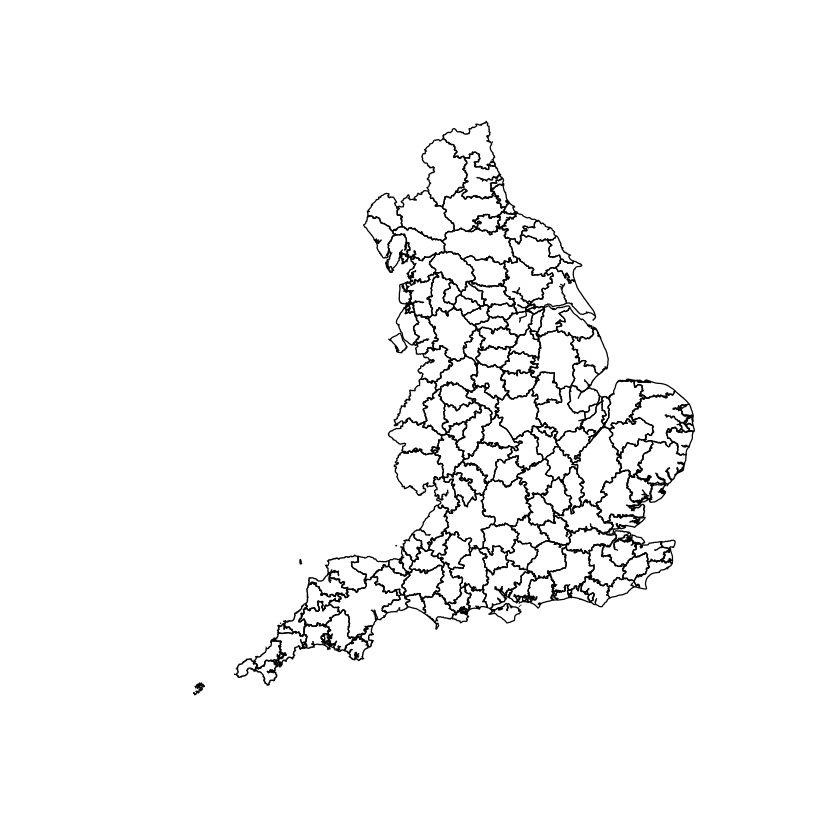

In [514]:
# plot the map
plot(st_geometry(eng_ttwa))

In [515]:
dfm = merge(raw_data,eng_ttwa,by.x="ttwa_code",by.y="TTWA11CD",all = TRUE)

In [516]:
# calculate the density of tech firms in ttwa

# df merged & density is calculated

#dfm_den_cal = dfm %>%
#    mutate(area=st_area(.))%>%
#    mutate(density = firms*1000*1000/area)

#head(dfm_den_cal)

In [517]:
tmap_mode("plot")

tmap mode set to plotting



### Data Prepare

In [548]:
# select year
df_1998 = raw_data %>% filter(year==1998)
df_2008 = raw_data %>% filter(year==2008)
df_2018 = raw_data %>% filter(year==2018)
df_2017_2018 = raw_data %>% filter(year==2017 | year==2018)

# merge
dfm_1998 = merge(eng_ttwa,df_1998,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)
dfm_2008 = merge(eng_ttwa,df_2008,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)
dfm_2018 = merge(eng_ttwa,df_2018,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)
dfm_2017_2018 = merge(eng_ttwa,df_2017_2018,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)
dfm_all = merge(eng_ttwa,raw_data,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)

# n/a -> 0
dfm_1998 = dfm_1998 %>% replace_na(list(entry_rate=0,hh=0,average_assets=0))
dfm_2008 = dfm_2008 %>% replace_na(list(entry_rate=0,hh=0,average_assets=0))
dfm_2018 = dfm_2018 %>% replace_na(list(entry_rate=0,hh=0,average_assets=0))
dfm_2017_2018 = dfm_2017_2018 %>% replace_na(list(entry_rate=0,hh=0,average_assets=0))
dfm_all = dfm_all %>% replace_na(list(entry_rate=0,hh=0,average_assets=0))

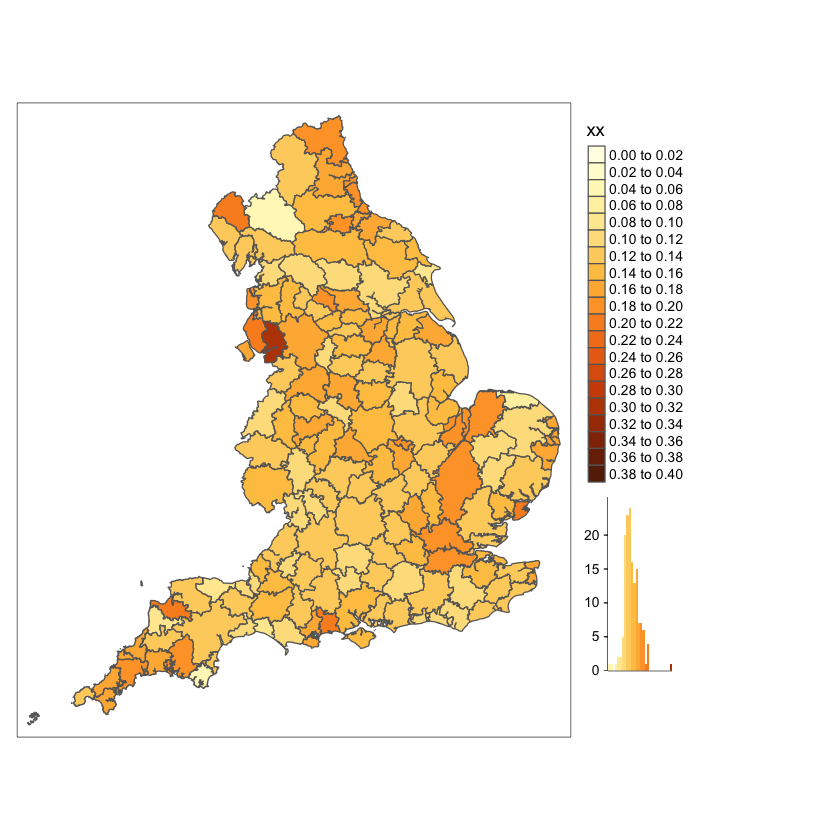

In [519]:
cus_break = c(0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4)

df = dfm_2018

tm_shape(df) +
  tm_polygons(col = "entry_rate",
              legend.hist = TRUE,
             title = "xx",
             breaks = cus_break) +
  tm_layout(legend.outside = TRUE) +
  tm_borders()

### Entry Rate

build the break

In [520]:
summary(dfm_all$entry_rate)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002457 0.018182 0.035029 0.048236 0.072000 0.312686 

In [521]:
summary(dfm_1998$entry_rate)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.007463 0.010000 0.010611 0.013026 0.029851 

In [522]:
summary(dfm_2008$entry_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02289 0.02941 0.02911 0.03409 0.07692 

In [523]:
summary(dfm_2018$entry_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04667 0.12153 0.13924 0.14328 0.16108 0.31269 

In [549]:
# cus_break = c(0,0.01,0.02,0.03,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4)
# cus_break = c(0,0.04,0.08,0.12,0.16,0.2,0.24,0.28,0.32,0.36,0.4)
# cus_break = c(0,0.01,0.04,0.16,0.32,0.4)
# cus_break = c(0,0.001,0.005,0.01,0.03,0.05,0.10,0.15,0.2,0.4)
# cus_break = c(0,0.002457,0.018182,0.035029,0.048236,0.12153,0.14328,0.16108,0.32)

cus_break = c(0.00,0.007,0.01,0.013,0.03,0.035,0.077,0.12153,0.14,0.16,0.32)
# library(viridis)

In [525]:
# adjust with the colour
# tmaptools::palette_explorer()

In [600]:
dfm %>% info

ERROR: Error in info(.): could not find function "info"


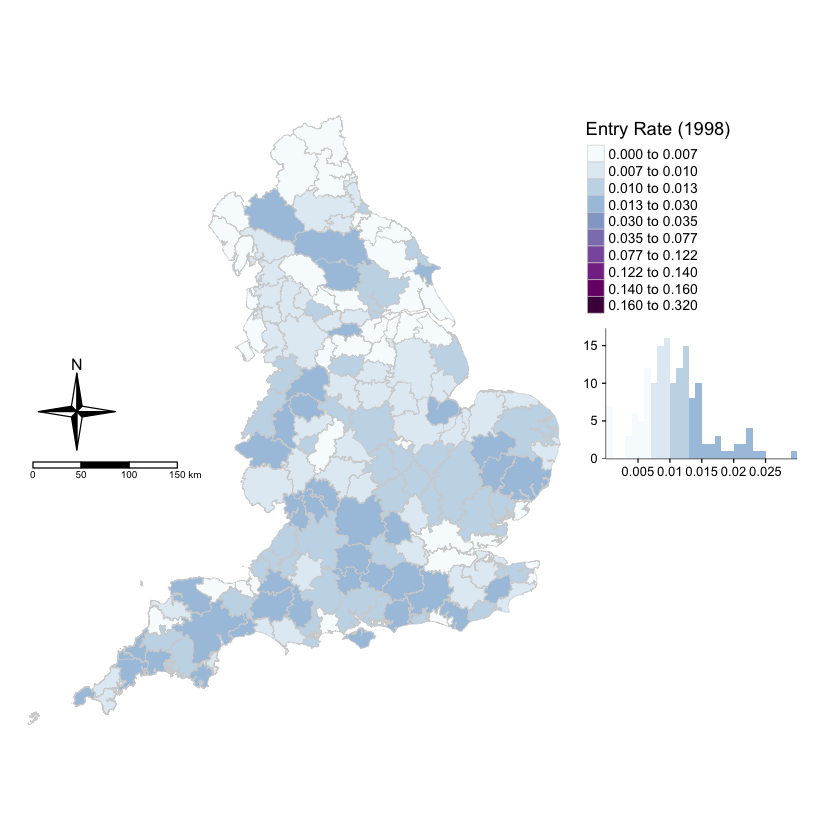

In [598]:
# plot the figure: The distribution of the density of the London charge points in 2019
# Title: The distribution of the entry rate of the England tech clusters(ttwa) from 1998 to 2018
df = dfm_1998
map_var = "entry_rate"
spatial_var = "ttwa"
legend_name = "Entry Rate (1998)"
title_name = "The Distribution of the Entry Rate of the England Tech Clusters(ttwa) in 1998"

enR_1998_map = tm_shape( df )+ 
        tm_compass( north = 0,
              type = "4star",
#               text.size = 0.8,
#               size = 5.5,
              show.labels = TRUE,
              cardinal.directions = c("N", "E", "S", "W"),
              lwd = 1,
              position = c("left","center"),
              bg.color = NA,
              bg.alpha = NA,
              just = NA)+ 
        tm_scale_bar(position=c("left", "center"),
#                      text.size = 1.5
                     breaks =c(50,100,150)
                    )+ 
#         tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.73, .0085),fontface = "bold")+ 
        tm_fill(col = map_var,
#               style="jenks",
              palette = "BuPu", n = 12,
#               pal = viridis(10, direction = -1),
              breaks = cus_break, 
#               popup.vars=c(spatial_var, map_var),
              title=legend_name,
#               title.size = 1.5,
              legend.hist = TRUE,
              legend.hist.position = c("left", "center")
              )+ 
        tm_layout(main.title = "",main.title.size = .85,
                 frame=FALSE,
                 legend.outside =TRUE,
                 legend.hist.width = 1.2,
                 legend.hist.height = .25 )+
        tm_borders(col = "#D2D2D2", lwd = .5, lty = "solid", alpha = NA)


enR_1998_map
# tmap_arrange(enR_1998_map,tm_tmp1)
# enR_1998_map %>% tmap_save(here("Img","enR_1998.png"),dpi=300)

In [579]:
head(dfm)

ttwa_code X ttwa     year firms total_firms entry_rate  hh        
1 E30000004 0 Barnsley 1998 10    749         0.013351135 0.12000000
2 E30000004 1 Barnsley 1999  6    749         0.008010681 0.33333333
3 E30000004 2 Barnsley 2000  8    749         0.010680908 0.15625000
4 E30000004 3 Barnsley 2001  8    749         0.010680908 0.12500000
5 E30000004 4 Barnsley 2002 11    749         0.014686248 0.09090909
6 E30000004 5 Barnsley 2003 20    749         0.026702270 0.13000000
  average_assets OBJECTID TTWA11NM Shape__Area Shape__Length
1  19405.25      1        Barnsley 342499168   129308.3     
2 759500.50      1        Barnsley 342499168   129308.3     
3 286162.33      1        Barnsley 342499168   129308.3     
4 129527.43      1        Barnsley 342499168   129308.3     
5  56740.40      1        Barnsley 342499168   129308.3     
6  78448.90      1        Barnsley 342499168   129308.3     
  geometry                      
1 MULTIPOLYGON (((-1.44681 53...
2 MULTIPOLYGON (((-1.44681 53...
3 MULTIPOLYGON (((-1.44681 53...
4 MULTIPOLYGON (((-1.44681 53...
5 MULTIPOLYGON (((-1.44681 53...
6 MULTIPOLYGON (((-1.44681 53...

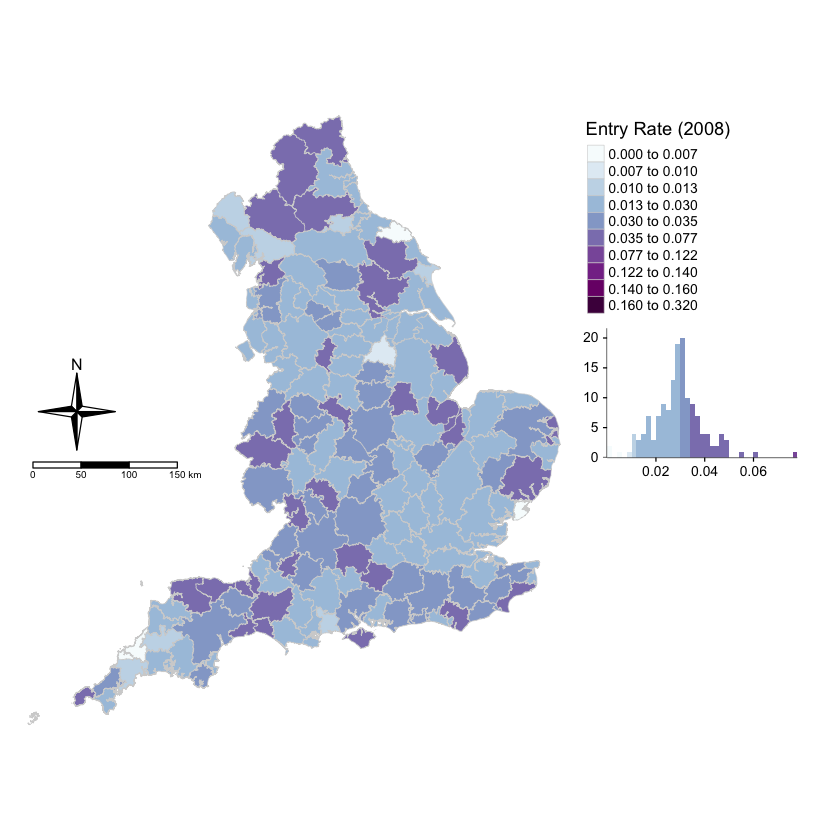

In [551]:
# plot the figure: The distribution of the density of the London charge points in 2019
# Title: The distribution of the entry rate of the England tech clusters(ttwa) from 1998 to 2018
df = dfm_2008
map_var = "entry_rate"
spatial_var = "ttwa"
legend_name = "Entry Rate (2008)"
title_name = "The Distribution of the Entry Rate of the England Tech Clusters(ttwa) in 2008"

enR_2008_map = tm_shape( df )+ 
        tm_compass( north = 0,
              type = "4star",
#               text.size = 0.8,
#               size = 5.5,
              show.labels = TRUE,
              cardinal.directions = c("N", "E", "S", "W"),
              lwd = 1,
              position = c("left","center"),
              bg.color = NA,
              bg.alpha = NA,
              just = NA)+ 
        tm_scale_bar(position=c("left", "center"),
#                      text.size = 1.5
                    )+ 
#         tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.73, .0085),fontface = "bold")+ 
        tm_fill(col = map_var,
#               style="jenks",
              palette = "BuPu", n = 7,
#               pal = viridis(10, direction = -1),
              breaks = cus_break, 
#               popup.vars=c(spatial_var, map_var),
              title=legend_name,
#               title.size = 1.5,
              legend.hist = TRUE,
              legend.hist.position = c("left", "center")
              )+ 
        tm_layout(main.title = "",main.title.size = .85,
                 frame=FALSE,
                 legend.outside =TRUE,
                 legend.hist.width = 1.2,
                 legend.hist.height = .25 )+
        tm_borders(col = "#D2D2D2", lwd = .5, lty = "solid", alpha = NA)

enR_2008_map
# enR_1998_map %>% tmap_save(here("Img","enR_1998.png"),dpi=300)

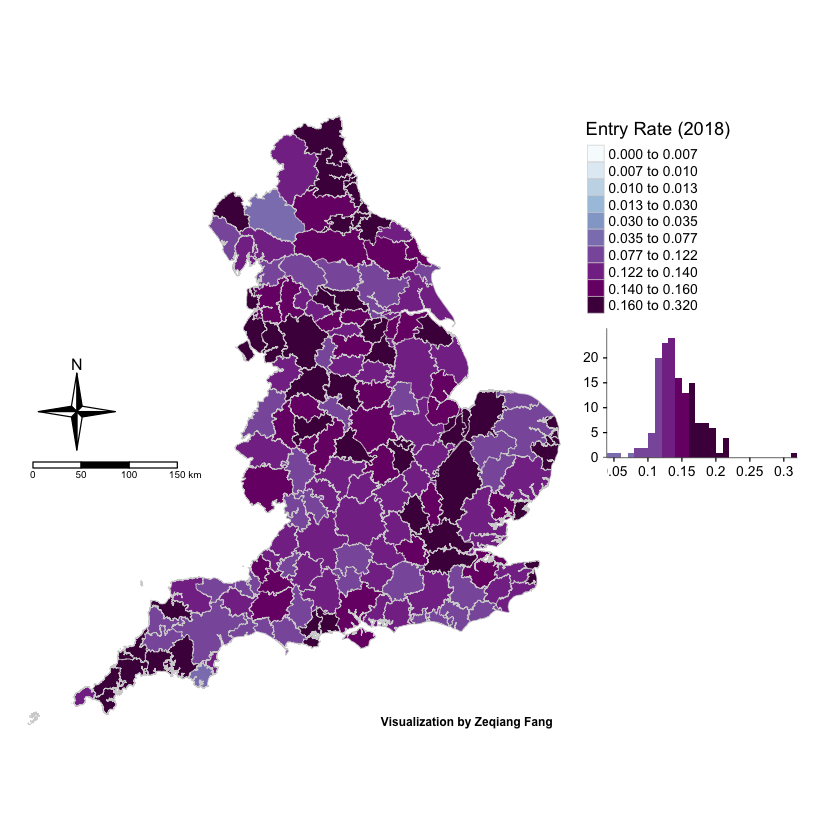

In [552]:
# plot the figure: The distribution of the density of the London charge points in 2019
# Title: The distribution of the entry rate of the England tech clusters(ttwa) from 1998 to 2018
df = dfm_2018
map_var = "entry_rate"
spatial_var = "ttwa"
legend_name = "Entry Rate (2018)"
title_name = "The Distribution of the Entry Rate of the England Tech Clusters(ttwa) in 2018"

enR_2018_map = tm_shape( df )+ 
        tm_compass( north = 0,
              type = "4star",
#               text.size = 0.8,
#               size = 5.5,
              show.labels = TRUE,
              cardinal.directions = c("N", "E", "S", "W"),
              lwd = 1,
              position = c("left","center"),
              bg.color = NA,
              bg.alpha = NA,
              just = NA)+ 
        tm_scale_bar(position=c("left", "center"),
#                      text.size = 1.5
                    )+ 
        tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.65, .0085),fontface = "bold")+ 
        tm_fill(col = map_var,
#               style="jenks",
              palette = "BuPu", n = 7,
#               pal = viridis(10, direction = -1),
              breaks = cus_break, 
#               popup.vars=c(spatial_var, map_var),
              title=legend_name,
#               title.size = 1.5,
              legend.hist = TRUE,
              legend.hist.position = c("left", "center")
              )+ 
        tm_layout(main.title = "",main.title.size = .85,
                 frame=FALSE,
                 legend.outside =TRUE,
                 legend.hist.width = 1.2,
                 legend.hist.height = .25 )+
        tm_borders(col = "#D2D2D2", lwd = .5, lty = "solid", alpha = NA)

enR_2018_map
# enR_1998_map %>% tmap_save(here("Img","enR_1998.png"),dpi=300)

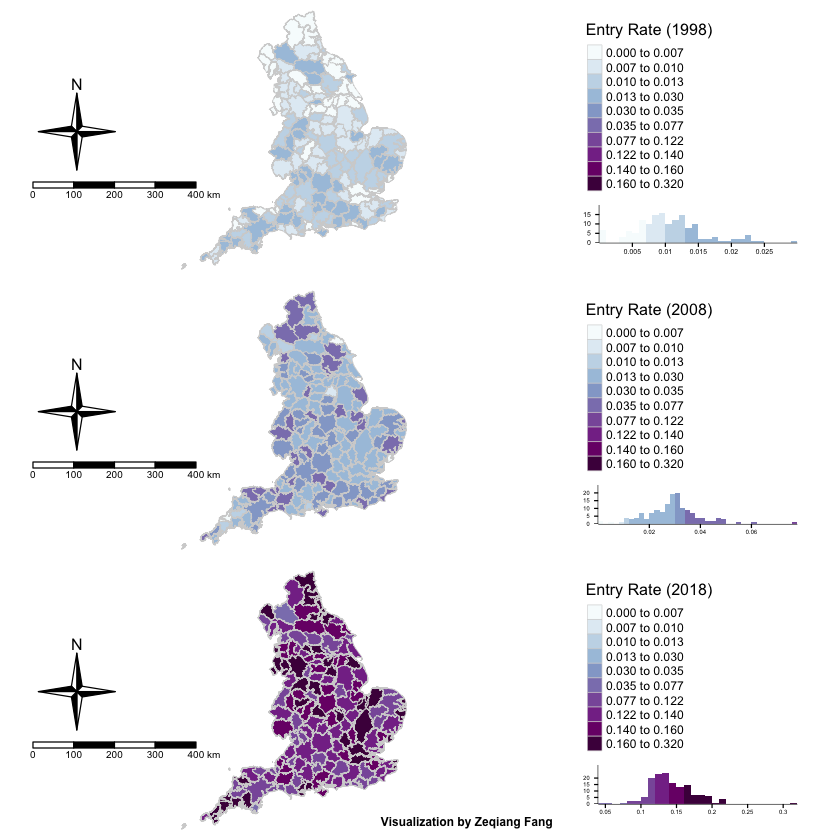

In [553]:
enR_tmap = tmap_arrange(enR_1998_map,enR_2008_map,enR_2018_map,ncol = 1)

enR_tmap

# enR_tmap %>% tmap_save(.,here("Img","map_entry_rate_1998_to_2018.png"),dpi = 300)

In [554]:
enR_tmap %>% tmap_save(.,here("Img","map_entry_rate_1998_to_2018.png"),dpi = 300)

Map saved to /Users/fangzeqiang/Github/Master-Dissertation/Img/map_entry_rate_1998_to_2018.png

Resolution: 2100 by 2100 pixels

Size: 7 by 7 inches (300 dpi)



In [555]:
# animation 
library(viridis)
library(gifski)
enR_animation <- tm_shape(dfm_all) +
  tm_polygons(
    col = "entry_rate",
    style = "cont",
    pal = "BuGn"
    ) +
  tm_facets(along = "year") +
  tm_layout(legend.position = c("left", "bottom"))
tmap_animation(
  enR_animation, filename = "enR.gif",
  delay = 50, width = 2400, height = 1200
  )

Creating frames
Creating animation
Animation saved to /Users/fangzeqiang/Github/Master-Dissertation/enR.gif 


In [531]:
nrow(dfm_all)

[1] 3089

### HHI

In [532]:
summary(dfm_all$hh)
# cus_break = c(0.002457,0.018182,0.035029,0.048236,0.072000,0.312686 )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03968 0.07292 0.10000 0.15342 0.15625 1.00000 

In [533]:
cus_break = c(0,0.03968,0.07292,0.10000,0.15342,0.15625,1.00000)

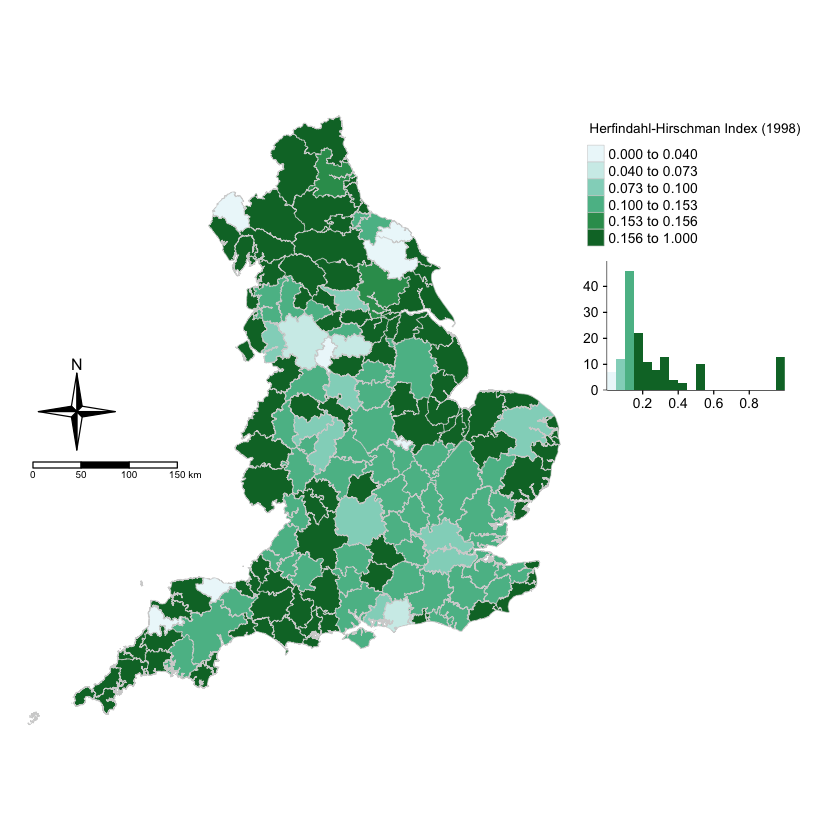

In [534]:
# plot the figure: The distribution of the density of the London charge points in 2019
# Title: The distribution of the entry rate of the England tech clusters(ttwa) from 1998 to 2018

df = dfm_1998
map_var = "hh"
spatial_var = "ttwa"
legend_name = " Herfindahl-Hirschman Index (1998)"
title_name = "The Distribution of the  Herfindahl-Hirschman Index of the England Tech Clusters(ttwa) in 1998"

hhi_1998_map = tm_shape( df )+ 
        tm_compass( north = 0,
              type = "4star",
#               text.size = 0.8,
#               size = 5.5,
              show.labels = TRUE,
              cardinal.directions = c("N", "E", "S", "W"),
              lwd = 1,
              position = c("left","center"),
              bg.color = NA,
              bg.alpha = NA,
              just = NA)+ 
        tm_scale_bar(position=c("left", "center"),
#                      text.size = 1.5
                    )+ 
#         tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.73, .0085),fontface = "bold")+ 
        tm_fill(col = map_var,
#               style="jenks",
              palette = "BuGn", n = 7,
#               pal = viridis(10, direction = -1),
              breaks = cus_break, 
#               popup.vars=c(spatial_var, map_var),
              title=legend_name,
#               title.size = 1.5,
              legend.hist = TRUE,
              legend.hist.position = c("left", "center")
              )+ 
        tm_layout(main.title = "",
                  main.title.size = .85,
                 frame=FALSE,
                 legend.outside =TRUE,
                 legend.hist.width = .85,
                 legend.hist.height = .25)+
        tm_borders(col = "#D2D2D2", lwd = .5, lty = "solid", alpha = NA)

hhi_1998_map

# enR_1998_map %>% tmap_save(here("Img","enR_1998.png"),dpi=300)

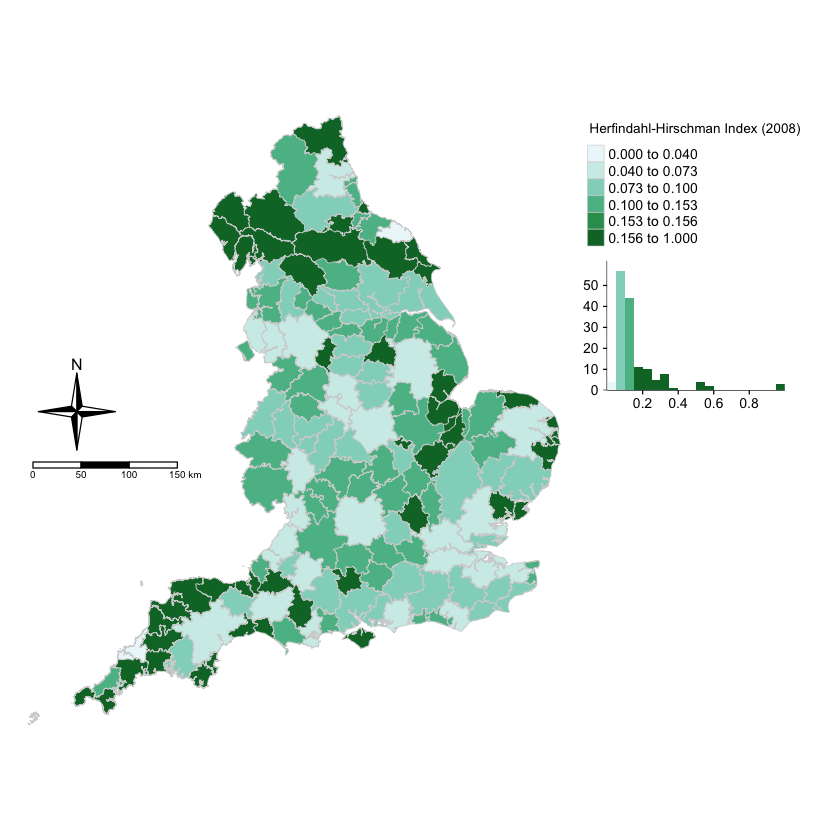

In [535]:
# plot the figure: The distribution of the density of the London charge points in 2019
# Title: The distribution of the entry rate of the England tech clusters(ttwa) from 1998 to 2018

df = dfm_2008
map_var = "hh"
spatial_var = "ttwa"
legend_name = " Herfindahl-Hirschman Index (2008)"
title_name = "The Distribution of the  Herfindahl-Hirschman Index of the England Tech Clusters(ttwa) in 2008"

hhi_2008_map = tm_shape( df )+ 
        tm_compass( north = 0,
              type = "4star",
#               text.size = 0.8,
#               size = 5.5,
              show.labels = TRUE,
              cardinal.directions = c("N", "E", "S", "W"),
              lwd = 1,
              position = c("left","center"),
              bg.color = NA,
              bg.alpha = NA,
              just = NA)+ 
        tm_scale_bar(position=c("left", "center"),
#                      text.size = 1.5
                    )+ 
#         tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.73, .0085),fontface = "bold")+ 
        tm_fill(col = map_var,
#               style="jenks",
              palette = "BuGn", n = 7,
#               pal = viridis(10, direction = -1),
              breaks = cus_break, 
#               popup.vars=c(spatial_var, map_var),
              title=legend_name,
#               title.size = 1.5,
              legend.hist = TRUE,
              legend.hist.position = c("left", "center")
              )+ 
        tm_layout(main.title = "",
                  main.title.size = .85,
                 frame=FALSE,
                 legend.outside =TRUE,
                 legend.hist.width = .85,
                 legend.hist.height = .25)+
        tm_borders(col = "#D2D2D2", lwd = .5, lty = "solid", alpha = NA)

hhi_2008_map

# enR_1998_map %>% tmap_save(here("Img","enR_1998.png"),dpi=300)

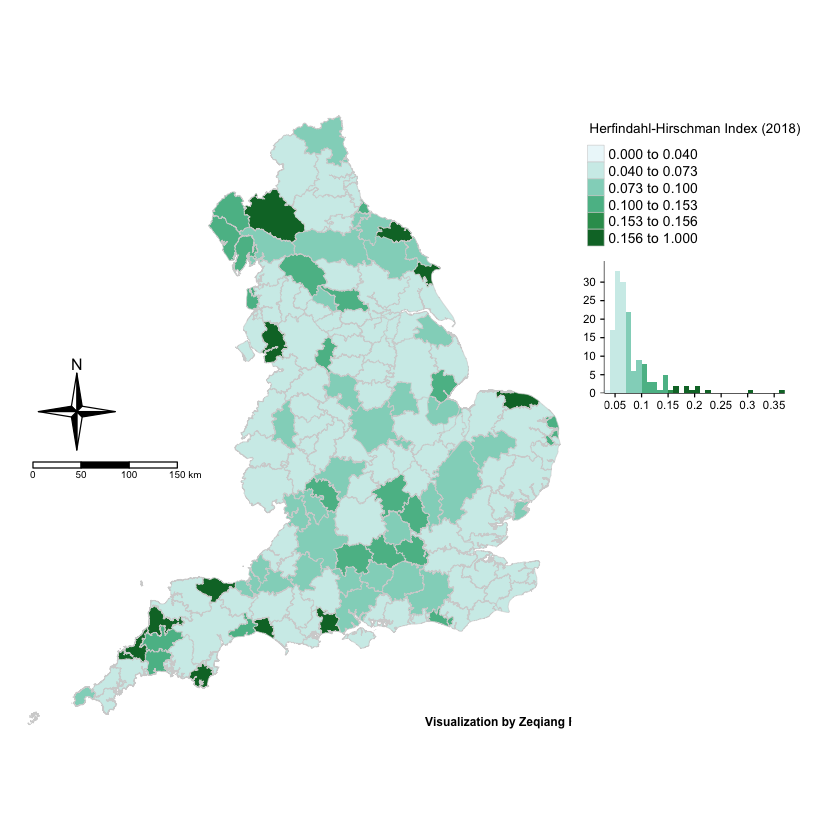

In [536]:
# plot the figure: The distribution of the density of the London charge points in 2019
# Title: The distribution of the entry rate of the England tech clusters(ttwa) from 1998 to 2018

df = dfm_2018
map_var = "hh"
spatial_var = "ttwa"
legend_name = " Herfindahl-Hirschman Index (2018)"
title_name = "The Distribution of the  Herfindahl-Hirschman Index of the England Tech Clusters(ttwa) in 2018"

hhi_2018_map = tm_shape( df )+ 
        tm_compass( north = 0,
              type = "4star",
#               text.size = 0.8,
#               size = 5.5,
              show.labels = TRUE,
              cardinal.directions = c("N", "E", "S", "W"),
              lwd = 1,
              position = c("left","center"),
              bg.color = NA,
              bg.alpha = NA,
              just = NA)+ 
        tm_scale_bar(position=c("left", "center"),
#                      text.size = 1.5
                    )+ 
        tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.73, .0085),fontface = "bold")+ 
        tm_fill(col = map_var,
#               style="jenks",
              palette = "BuGn", n = 7,
#               pal = viridis(10, direction = -1),
              breaks = cus_break, 
#               popup.vars=c(spatial_var, map_var),
              title=legend_name,
#               title.size = 1.5,
              legend.hist = TRUE,
              legend.hist.position = c("left", "center")
              )+ 
        tm_layout(main.title = "",
                  main.title.size = .85,
                 frame=FALSE,
                 legend.outside =TRUE,
                 legend.hist.width = .85,
                 legend.hist.height = .25)+
        tm_borders(col = "#D2D2D2", lwd = .5, lty = "solid", alpha = NA)

hhi_2018_map

# enR_1998_map %>% tmap_save(here("Img","enR_1998.png"),dpi=300)

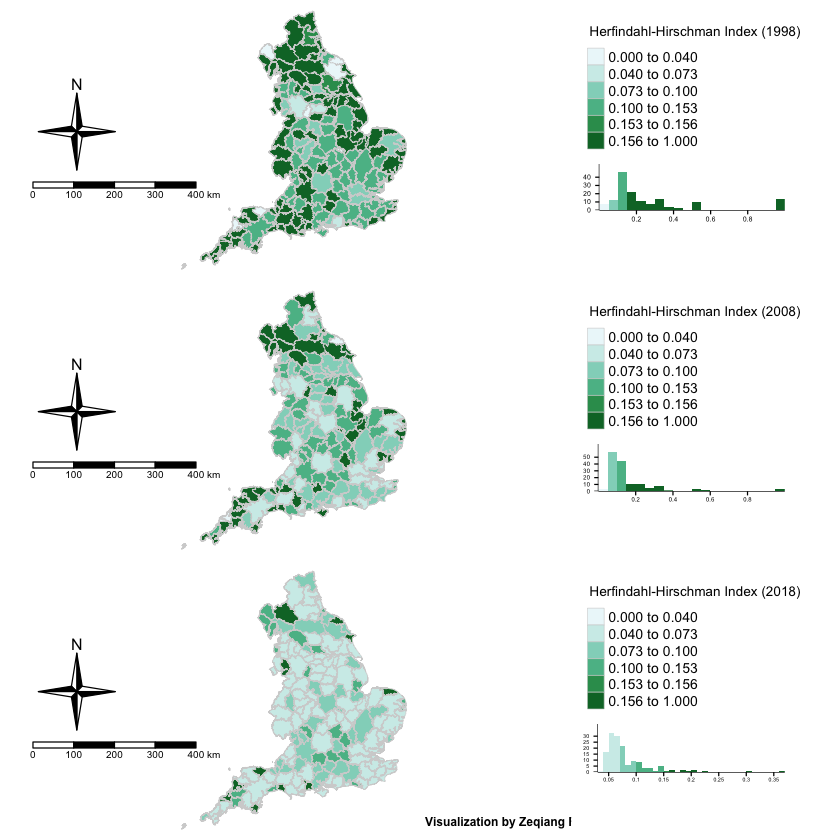

In [537]:
hh_tmap = tmap_arrange(hhi_1998_map,hhi_2008_map,hhi_2018_map,ncol=1)

hh_tmap

# enR_tmap %>% tmap_save(.,here("Img","map_entry_rate_1998_to_2018.png"),dpi = 300)

In [545]:
hh_tmap %>% tmap_save(.,here("Img","map_hh_1998_to_2018.png"),dpi = 300)

Map saved to /Users/fangzeqiang/Github/Master-Dissertation/Img/map_hh_1998_to_2018.png

Resolution: 2100 by 2100 pixels

Size: 7 by 7 inches (300 dpi)



### Performance

In [538]:
df_1998 = raw_data %>% filter(year==1998)
df_2008 = raw_data %>% filter(year==2008)
df_2018 = raw_data %>% filter(year==2018)
df_2016 = raw_data %>% filter(year==2016)
df_2017 = raw_data %>% filter(year==2017)
df_2017_2018 = raw_data %>% filter(year==2017 | year==2018)

# merge
dfm_1998 = merge(eng_ttwa,df_1998,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)
dfm_2008 = merge(eng_ttwa,df_2008,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)
dfm_2018 = merge(eng_ttwa,df_2018,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)
dfm_2017 = merge(eng_ttwa,df_2017,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)
dfm_2016 = merge(eng_ttwa,df_2016,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)
dfm_all = merge(eng_ttwa,raw_data,by.x="TTWA11CD",by.y="ttwa_code",all.x = TRUE)

build the custom breaks

In [539]:
dfm_all$average_assets %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   36420   74111  126571  149514 8532989 

In [540]:
dfm_1998$average_assets %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0   69489  142248  212893  265075 1857840       7 

In [541]:
dfm_2008$average_assets %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0   58893   94608  143101  137814 5307552       2 

In [542]:
raw_data %>% 
filter(.,year==2014)%>% 
summary()

       X                       ttwa         ttwa_code        year     
 Min.   :  16   Andover          :  1   E30000004:  1   Min.   :2014  
 1st Qu.: 776   Ashford          :  1   E30000018:  1   1st Qu.:2014  
 Median :1546   Banbury          :  1   E30000029:  1   Median :2014  
 Mean   :1547   Barnsley         :  1   E30000039:  1   Mean   :2014  
 3rd Qu.:2315   Barnstaple       :  1   E30000046:  1   3rd Qu.:2014  
 Max.   :3084   Barrow-in-Furness:  1   E30000051:  1   Max.   :2014  
                (Other)          :143   (Other)  :143                 
     firms          total_firms       entry_rate            hh         
 Min.   :    1.0   Min.   :    54   Min.   :0.01852   Min.   :0.03968  
 1st Qu.:   27.0   1st Qu.:   316   1st Qu.:0.07843   1st Qu.:0.06774  
 Median :   70.0   Median :   777   Median :0.08802   Median :0.08390  
 Mean   :  221.8   Mean   :  2446   Mean   :0.08676   Mean   :0.10569  
 3rd Qu.:  177.0   3rd Qu.:  1876   3rd Qu.:0.09574   3rd Qu.:0.11317  


In [543]:
cus_break = c(0,56900,58518,60194,91560,135434,141180,202891,263037,5307552,8532989,18578409)

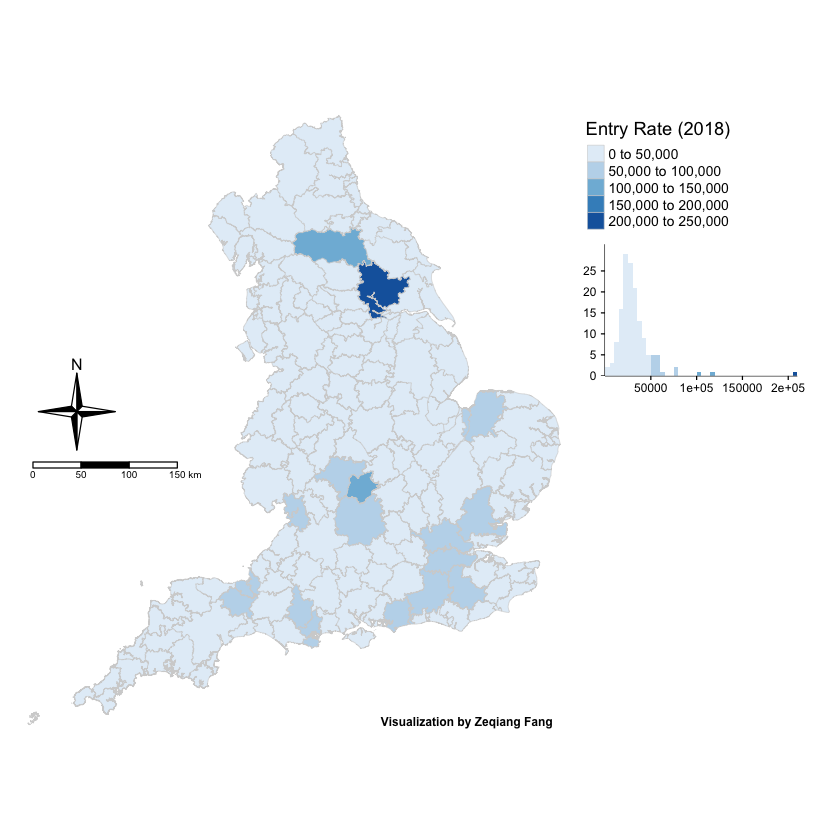

In [544]:
# plot the figure: The distribution of the density of the London charge points in 2019
# Title: The distribution of the entry rate of the England tech clusters(ttwa) from 1998 to 2018
df = dfm_2016
map_var = "average_assets"
spatial_var = "ttwa"
legend_name = "Entry Rate (2018)"
title_name = "The Distribution of the Entry Rate of the England Tech Clusters(ttwa) in 2018"

l1 = tm_shape( df )+ 
        tm_compass( north = 0,
              type = "4star",
#               text.size = 0.8,
#               size = 5.5,
              show.labels = TRUE,
              cardinal.directions = c("N", "E", "S", "W"),
              lwd = 1,
              position = c("left","center"),
              bg.color = NA,
              bg.alpha = NA,
              just = NA)+ 
        tm_scale_bar(position=c("left", "center"),
#                      text.size = 1.5
                    )+ 
        tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.65, .0085),fontface = "bold")+ 
        tm_fill(col = map_var,
#               style="jenks",
              palette = "Blues", n = 7,
#               pal = viridis(10, direction = -1),
#               breaks = cus_break, 
#               popup.vars=c(spatial_var, map_var),
              title=legend_name,
#               title.size = 1.5,
              legend.hist = TRUE,
              legend.hist.position = c("left", "center")
              )+ 
        tm_layout(main.title = "",main.title.size = .85,
                 frame=FALSE,
                 legend.outside =TRUE,
                 legend.hist.width = 1.2,
                 legend.hist.height = .25 )+
        tm_borders(col = "#D2D2D2", lwd = .5, lty = "solid", alpha = NA)
l1

# assets_2018_map
# enR_1998_map %>% tmap_save(here("Img","enR_1998.png"),dpi=300)

### Density of Tech Firms in ttwa of England

In [654]:
dfm2 = dfm_all %>% 
    mutate(area = st_area(geometry))%>%
    mutate(area_km = units::set_units(area,km^2))%>%
    mutate(density = firms / area_km)

In [ ]:
# 输出dfm2
dfm2 %>% write_csv(here(""))

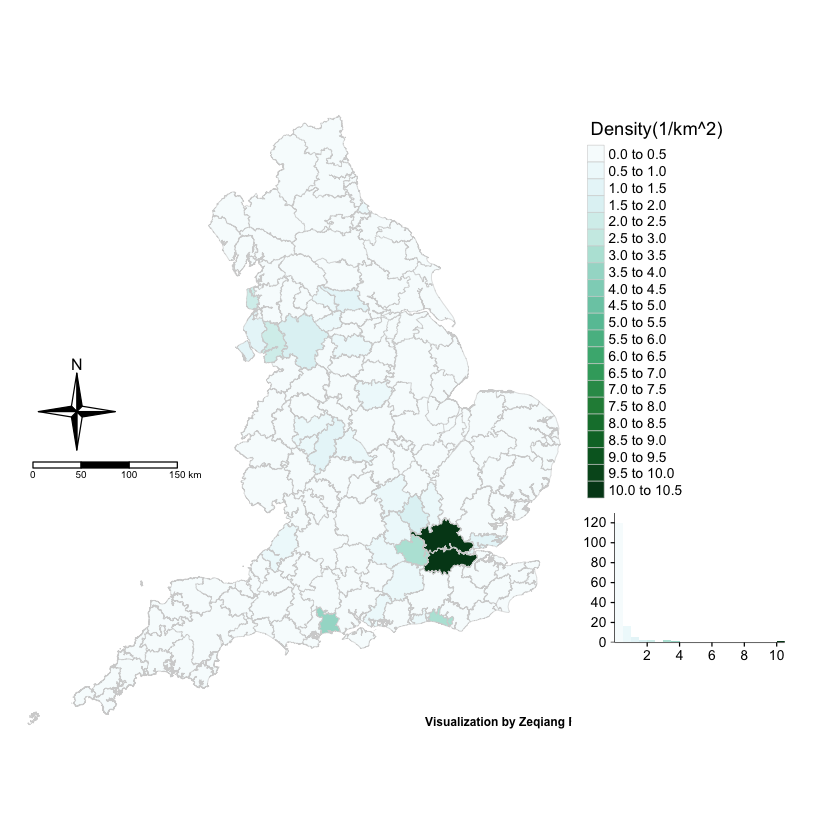

In [649]:
df = dfm1 %>% filter(year==2018)
map_var = "density"
legend_name = " Density(1/km^2)"
title_name = "The Distribution of The Density of the England Tech Clusters(ttwa) in 2018"

den_map = tm_shape( df )+ 
        tm_compass( north = 0,
              type = "4star",
              show.labels = TRUE,
              cardinal.directions = c("N", "E", "S", "W"),
              lwd = 1,
              position = c("left","center"),
              bg.color = NA,
              bg.alpha = NA,
              just = NA)+ 
        tm_scale_bar(position=c("left", "center"),
                    )+ 
        tm_credits("Visualization by Zeqiang Fang",size=.6,position = c(.73, .0085),fontface = "bold")+ 
        tm_fill(col = map_var,
              palette = "BuGn", n = 20,
#               breaks = cus_break, 
              title=legend_name,
              legend.hist = TRUE,
              legend.hist.position = c("left", "center")
              )+ 
        tm_layout(main.title = "",
                  main.title.size = .85,
                 frame=FALSE,
                 legend.outside =TRUE,
                 legend.hist.width = .85,
                 legend.hist.height = .25)+
        tm_borders(col = "#D2D2D2", lwd = .5, lty = "solid", alpha = NA)

den_map

# enR_1998_map %>% tmap_save(here("Img","enR_1998.png"),dpi=300)

# Reference

Moran's I 

https://en.wikipedia.org/wiki/Moran%27s_I

GWR

- Huang, B., Wu, B., & Barry, M. (2010). Geographically and temporally weighted regression for modeling spatio-temporal variation in house prices. International Journal of Geographical Information Science, 24(3), 383–401. doi:10.1080/13658810802672469

GWTR

- Fotheringham, A. S., Crespo, R., & Yao, J. (2015). Geographical and Temporal Weighted Regression (GTWR). Geographical Analysis, 47(4), 431–452. doi:10.1111/gean.12071 